# Lasso Regression (L1 penalty)
* `simi1` -- Lasso, Coordinate Descent
* `simi2` -- Lasso, LARS
* `simi3` -- Lasso, SGD
* `simi12` -- Lasso, LARS, IC-based model selection


In [1]:
# add path
import sys; import os; sys.path.append(os.path.realpath("../"))

# general hyperparameter optimization settings
from seasalt import (select_the_best, refit_model) 
from seasalt.si import (cv_settings, scorerfun, print_scores)
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# demo datasets
from datasets.demo2 import X_train, Y_train, fold_ids, X_valid, Y_valid, meta as meta_data
#meta_data

In [3]:
# model implementations
#from potpourri.simi1 import model, hyper, meta  # Coordinate Descent
#from potpourri.simi2 import model, hyper, meta  # LARS
#from potpourri.simi3 import model, hyper, meta  # SGD
from potpourri.simi12 import model, hyper, meta  # LARS
meta

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


{'id': 'simi12',
 'name': 'LinReg Lasso IC',
 'descriptions': 'Lasso Regression (L1 penalty), LARS solver, Autoselect l1 penalty based on information criteria aic or bic',
 'solver': 'Least Angle Regression (LARS)',
 'active': True,
 'keywords': ['linear regression',
  'univariate regression',
  'multiple regression',
  'model selection',
  'LassoLarsIC'],
 'output_num': 'single',
 'output_scale': 'interval',
 'output_dtype': 'float',
 'input_num': 'multi',
 'input_scale': 'interval',
 'input_dtype': 'float'}

## Train

In [4]:
%%time
rscv = RandomizedSearchCV(**{'estimator': model, 'param_distributions': hyper}, **cv_settings)
rscv.fit(X = X_train, y = Y_train)  # Run CV

bestparam, summary = select_the_best(rscv)  # find the "best" parameters
bestmodel = refit_model(model, bestparam, X_train, Y_train)  # Refit the "best" model

/Users/uh/cfs/venv-3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/uh/cfs/venv-3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 227 ms, sys: 93.2 ms, total: 320 ms
Wall time: 16.4 s


In [5]:
#rscv.cv_results_

## Evaluate

In [7]:
print("Infer/predict on validation set")
Y_pred = bestmodel.predict(X_valid)

print("\nOut of sample score")
print(scorerfun(Y_valid, Y_pred))

print("\nOut of sample score (Other metrics)")
print_scores(Y_pred, Y_valid)

print("\nBest model parameters")
print(bestparam)

print("\nIn-sample scores and model variants (from CV)")
summary

Infer/predict on validation set

Out of sample score
0.48068585526008345

Out of sample score (Other metrics)
  Mean Squared Error:    2803.4176
 Mean Absolute Error:      42.1918
    Median Abs Error:      33.4632
           R Squared:      -0.1806
  Explained Variance:      -0.1764

Best model parameters
{'lin__criterion': 'bic'}

In-sample scores and model variants (from CV)


,lin__criterion,cvratio,rank_test_score,mean_test_score,std_test_score,mean_fit_time,std_fit_time
1,bic,4.214602,2,0.424302,0.100674,0.055289,0.026515
0,aic,4.070806,1,0.452416,0.111137,0.049043,0.028882


### Parameters

In [8]:
bestmodel.steps[1][1].coef_

array([  0.        ,  -5.39973101,  26.60096542,  14.67826247,
         0.        ,   0.        , -11.71385667,   0.        ,
        15.94066461,   0.        ])

### Target vs Predicted

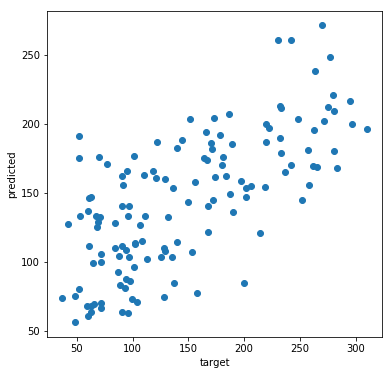

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
plt.scatter(y=Y_pred, x=Y_valid);
#plt.scatter(x=np.log(Y_pred), y=np.log(Y_valid));
plt.xlabel('target');
plt.ylabel('predicted');

## Debug, Memory, Misc

In [10]:
#del summary
#locals()
%whos

Variable             Type                  Data/Info
----------------------------------------------------
RandomizedSearchCV   ABCMeta               <class 'sklearn.model_sel<...>arch.RandomizedSearchCV'>
X_train              ndarray               309x10: 3090 elems, type `float64`, 24720 bytes
X_valid              ndarray               133x10: 1330 elems, type `float64`, 10640 bytes
Y_pred               ndarray               133: 133 elems, type `float64`, 1064 bytes
Y_train              ndarray               309: 309 elems, type `float64`, 2472 bytes
Y_valid              ndarray               133: 133 elems, type `float64`, 1064 bytes
bestmodel            Pipeline              Pipeline(memory=None,\n  <...>e=True, verbose=False))])
bestparam            dict                  n=1
cv_settings          dict                  n=6
fold_ids             ndarray               309: 309 elems, type `int64`, 2472 bytes
hyper                dict                  n=1
meta                 dict      